# WARNING: this notebook was not executed in order

In [1]:
%matplotlib inline
import PIL
from PIL import ImageDraw, ImageFont
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import math
from tqdm import tqdm_notebook as tqdm
import f1
from importlib import reload
import stable.center_model
import stable.classifier
import stable.predict
import stable.utils
import shutil

In [2]:
DATA = Path("data")

train_fnames = (DATA/"train_fnames.txt").read_text().split("\n")
valid_fnames = (DATA/"valid_fnames.txt").read_text().split("\n")

df_train = pd.read_csv("data/train.csv")
unicode_map = {codepoint: char for codepoint, char in pd.read_csv('data/unicode_translation.csv').values}

sample_submission = pd.read_csv("data/sample_submission.csv")

## Create heatmaps for whole pages

In [3]:
make_heatmaps = False

In [4]:
# !rm -r data/train_images_whole_1024
# !rm -r data/train_images_heatmaps_whole_1024

In [5]:
size=512

if make_heatmaps:
    stable.center_model.generate_heatmaps_circular_whole_page(
        im_path=DATA/"train_images",
        im_save_path=DATA/f"train_images_whole_{size}",
        hm_save_path=DATA/f"train_images_heatmaps_whole_{size}",
        df=df_train,
        resize_to=size,
        radius=5,
        intensity_res=5)

# Train

In [6]:
seed = 42

# python RNG
import random
random.seed(seed)

# pytorch RNGs
import torch
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

# numpy RNG
import numpy as np
np.random.seed(seed)

In [7]:
from fastai.vision import *
from fastai import layers

In [8]:
data = None; import gc; gc.collect()
learn_gen = None; gc.collect()

0

In [28]:
??get_transforms

In [51]:
def get_data(size=512, bs=1):
    tfms = get_transforms(do_flip=False, max_zoom=1.,
                         xtra_tfms=[cutout(),])

    data = (ImageImageList.from_folder(DATA/"train_images_whole_1024")
           .split_by_valid_func(lambda x: x.name[:-4] in valid_fnames)
           #.split_by_rand_pct(valid_pct=0.2)
           .label_from_func(lambda x: DATA/"train_images_heatmaps_whole_1024"/(x.name[:-4]+".png"), convert_mode="L")
           #.label_from_func(lambda x: DATA/"train_images_random_crops"/(x.name))
           .transform(tfms, tfm_y=True, size=size, resize_method=ResizeMethod.SQUISH)
           .databunch(bs=bs, num_workers=6)
           .normalize())

    data.c = 1
    return data

In [52]:
def center_detection_accuracy(preds, targets):
    print(preds)
    print(targets)
    for pred, target in zip(preds, targets):
        pass
    return torch.Tensor(1)
    
def create_gen_learner(data, arch=models.resnet18, wd=None):
    learn = unet_learner(data, arch, callback_fns=[ShowGraph,
                                                          partial(callbacks.MixedPrecision, loss_scale=1024),
                                                          callbacks.CSVLogger,
                                                          #callbacks.ReduceLROnPlateauCallback
                                                         ],
                    metrics=[mean_squared_error, mean_absolute_error
                            #center_detection_accuracy
                            ],
                    blur=True, norm_type=NormType.Weight, 
                         self_attention=True)
    learn.loss_func = mean_squared_error
    #learn.loss_func = FocalLoss(alpha=0.25, gamma=2)
    #learn.loss_func = F.binary_cross_entropy_with_logits
    return learn

In [53]:
data = get_data(size=512, bs=1)

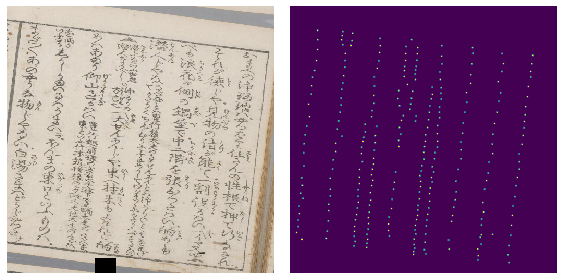

In [54]:
data.show_batch()

In [57]:
learn_gen = create_gen_learner(data)

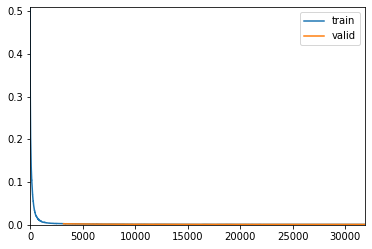

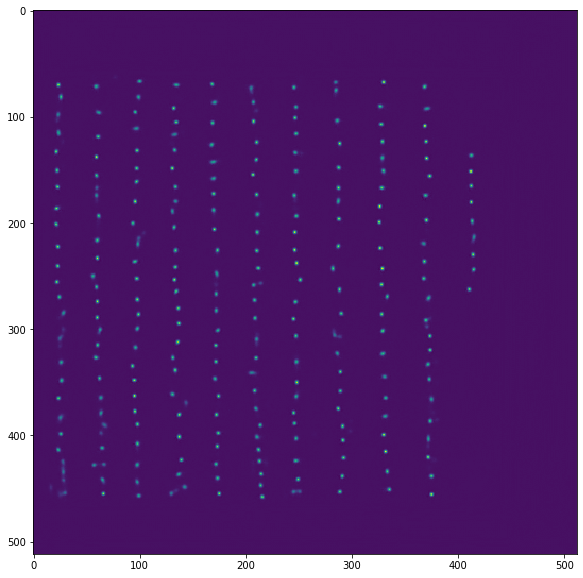

In [58]:
learn_gen.fit_one_cycle(10, slice(1e-4))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

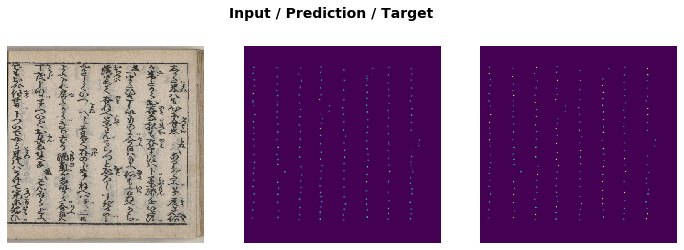

In [59]:
learn_gen.show_results()

In [60]:
learn_gen.save("20190922_10-epochs")

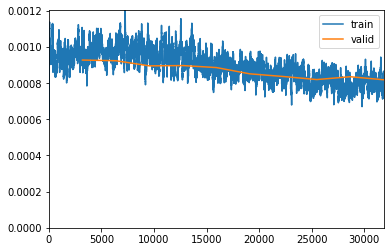

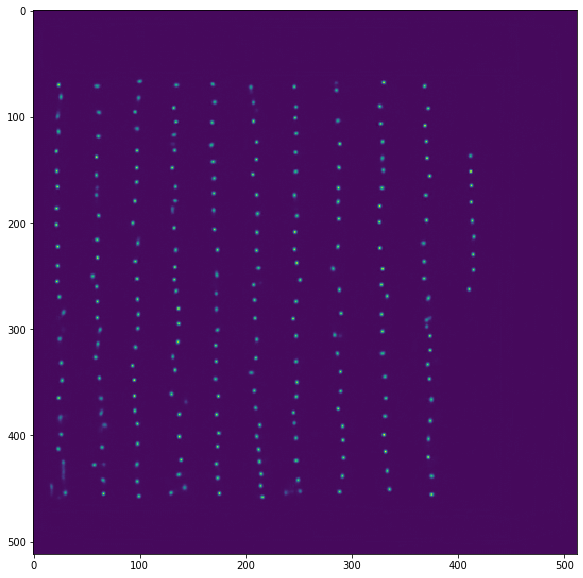

In [61]:
learn_gen.fit_one_cycle(10, slice(1e-4))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

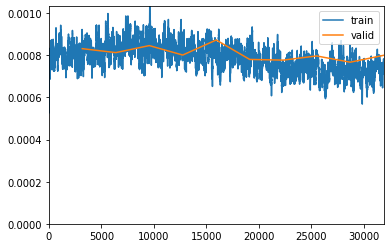

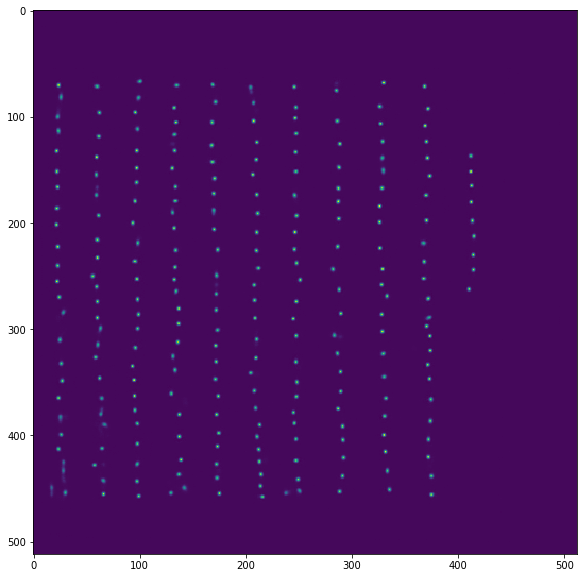

In [62]:
learn_gen.fit_one_cycle(10, slice(1e-4))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

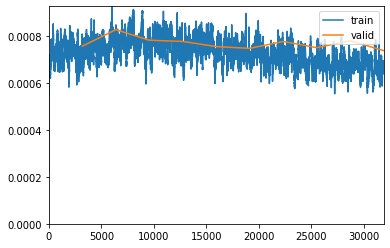

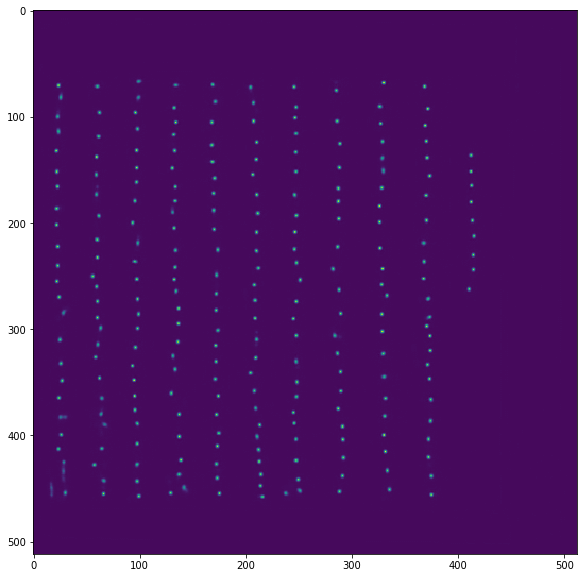

In [63]:
learn_gen.fit_one_cycle(10, slice(1e-4))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

In [64]:
learn_gen.save("20190922_40-epochs")

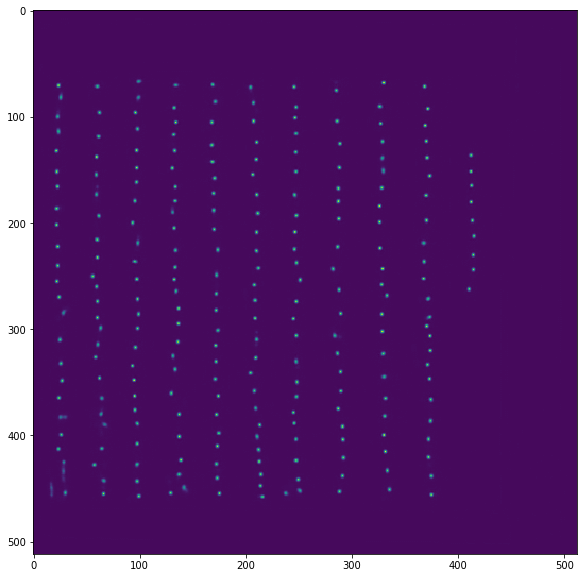

In [72]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

In [42]:
learn_gen.save("64")

In [46]:
learn_gen = create_gen_learner(get_data(size=256, bs=4), wd=1e-3)

In [47]:
learn_gen = learn_gen.load("64")

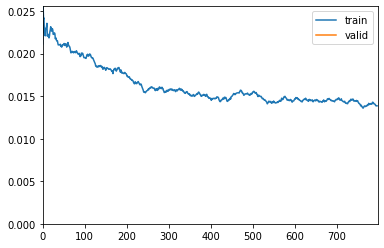

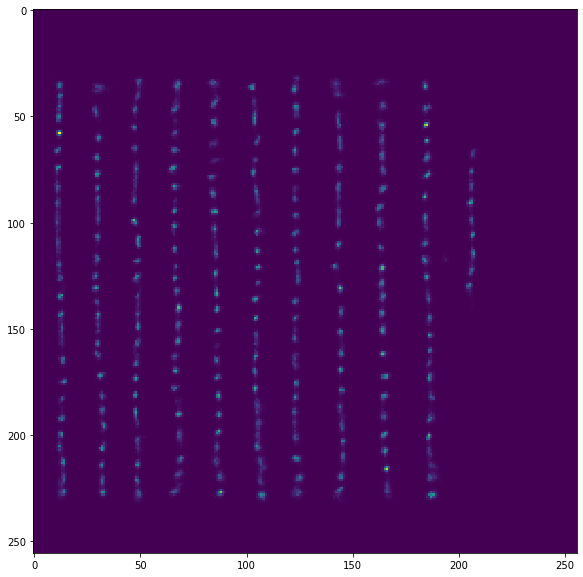

In [48]:
learn_gen.fit_one_cycle(1, 1e-4)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

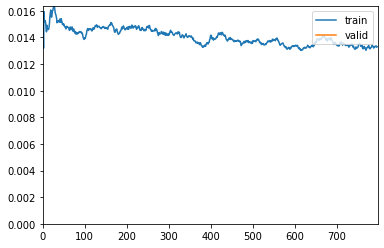

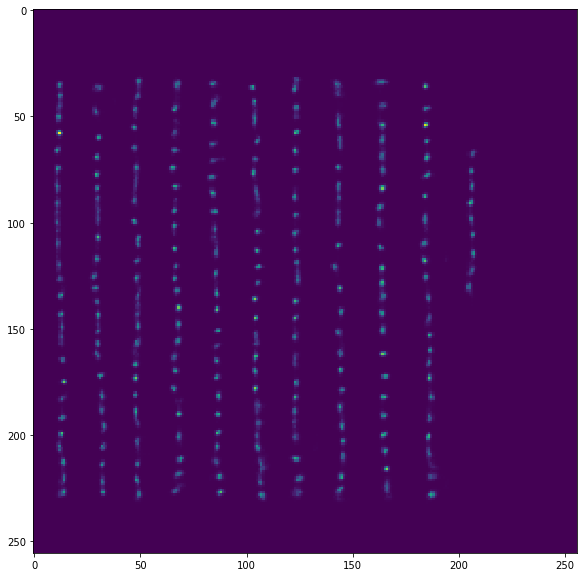

In [49]:
learn_gen.fit_one_cycle(1, 1e-4)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

In [50]:
learn_gen.save("128")

In [53]:
learn_gen = create_gen_learner(get_data(size=512, bs=2), wd=1e-3)
learn_gen = learn_gen.load("128")

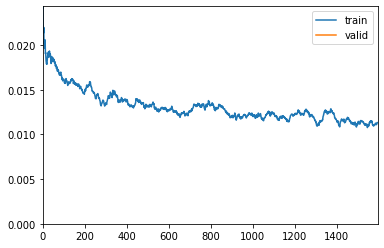

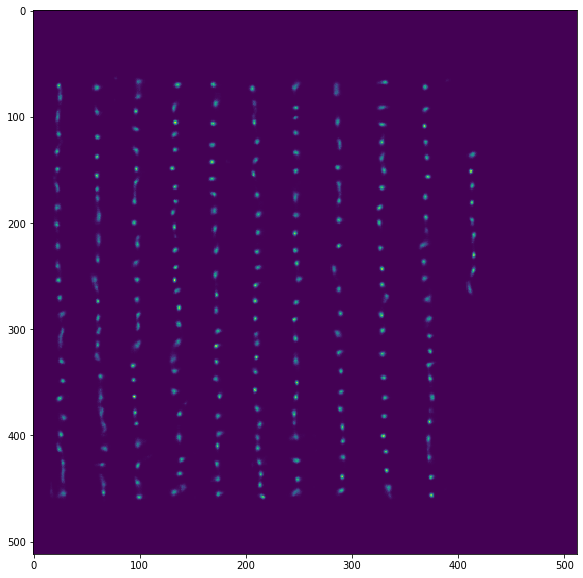

In [54]:
learn_gen.fit_one_cycle(1, 1e-4)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

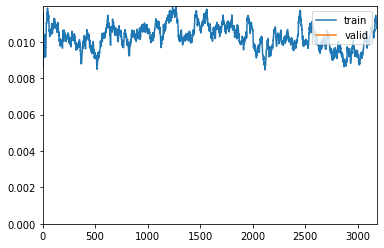

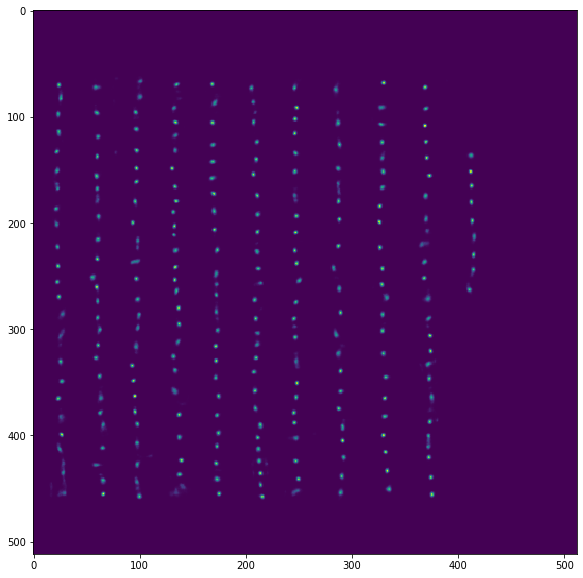

In [19]:
learn_gen.fit_one_cycle(1, 1e-4)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

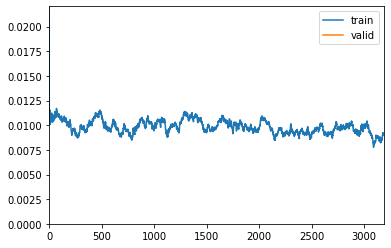

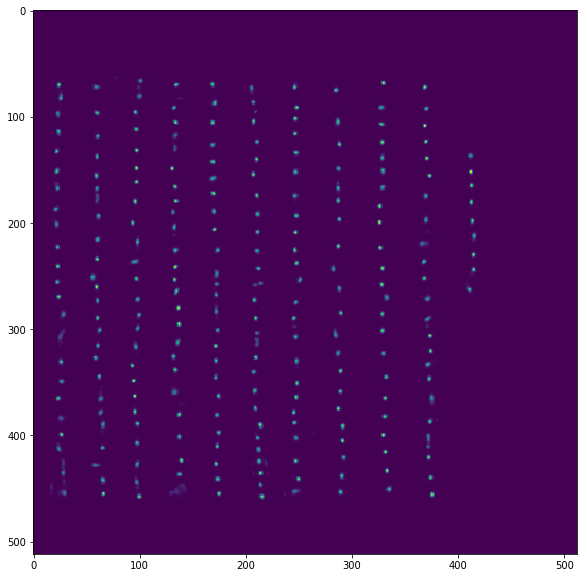

In [20]:
learn_gen.fit_one_cycle(1, 1e-4)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

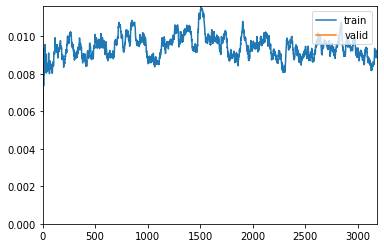

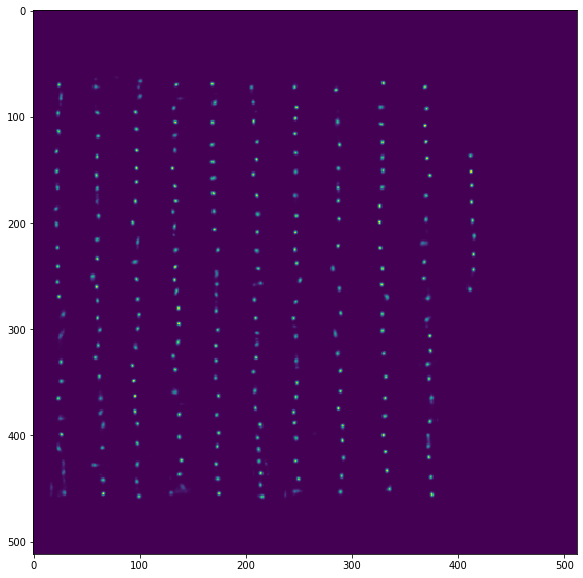

In [21]:
learn_gen.fit_one_cycle(1, 1e-4)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

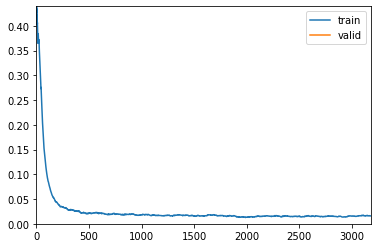

In [13]:
learn_gen.fit_one_cycle(1, 1e-4)

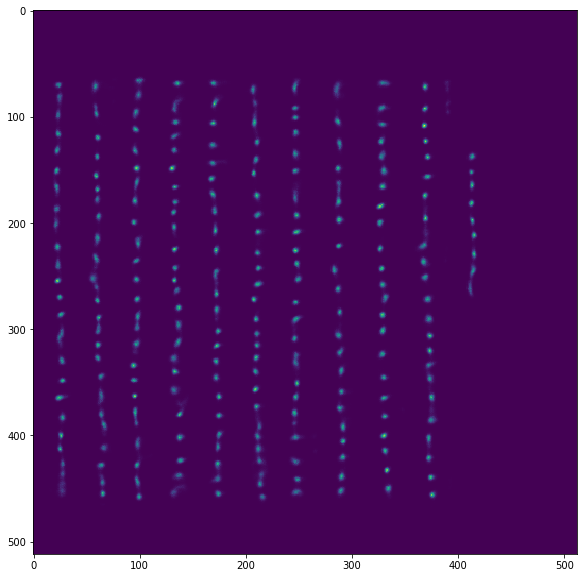

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0]

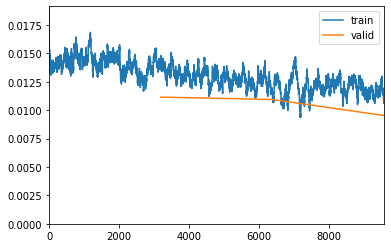

In [15]:
learn_gen.fit_one_cycle(3, 1e-4)

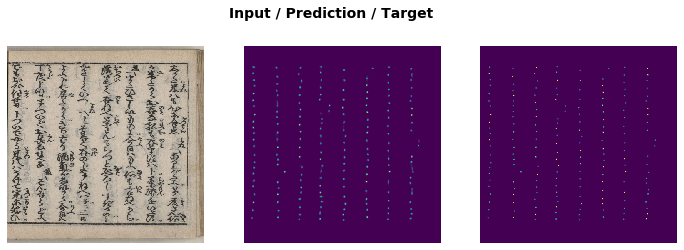

In [16]:
learn_gen.show_results()

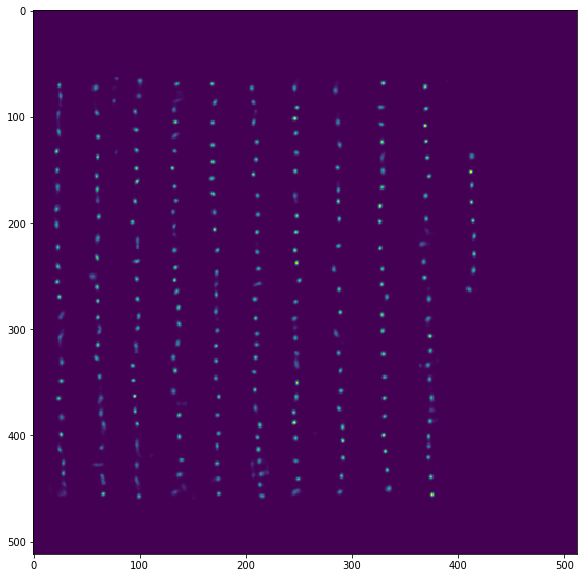

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

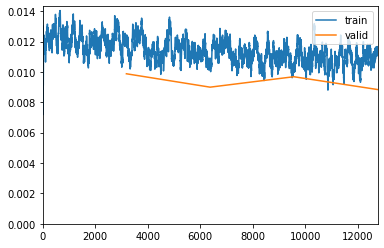

In [18]:
learn_gen.fit(4, 1e-4)

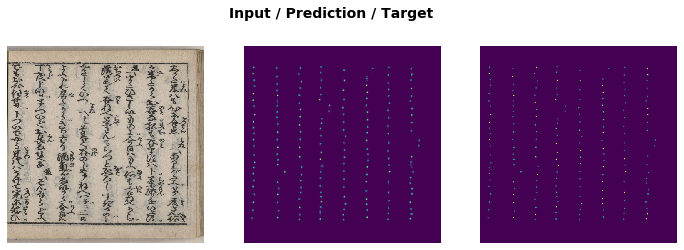

In [19]:
learn_gen.show_results()

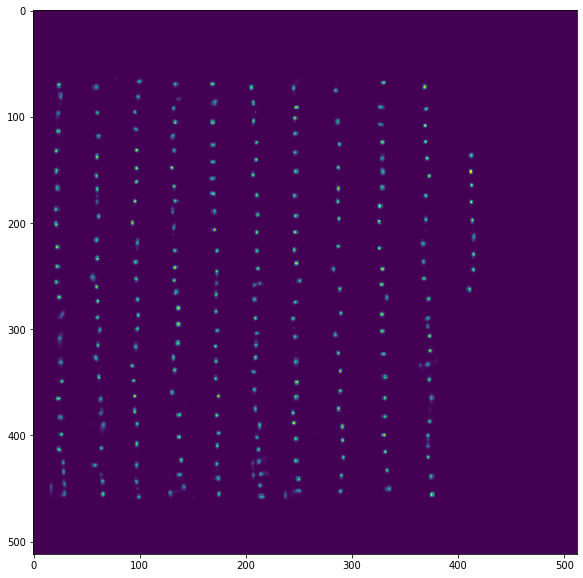

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

In [21]:
learn_gen.unfreeze()

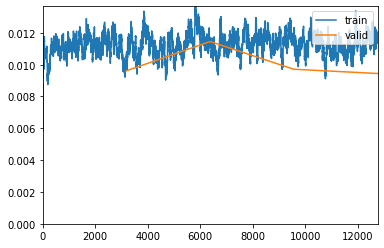

In [22]:
learn_gen.fit(4, 1e-4)

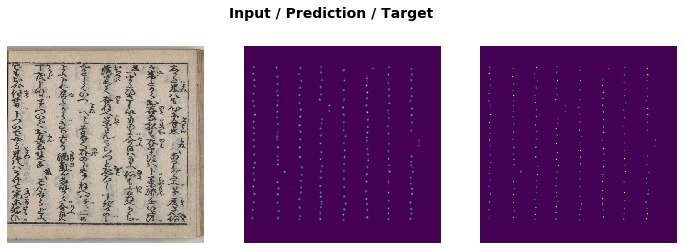

In [23]:
learn_gen.show_results()

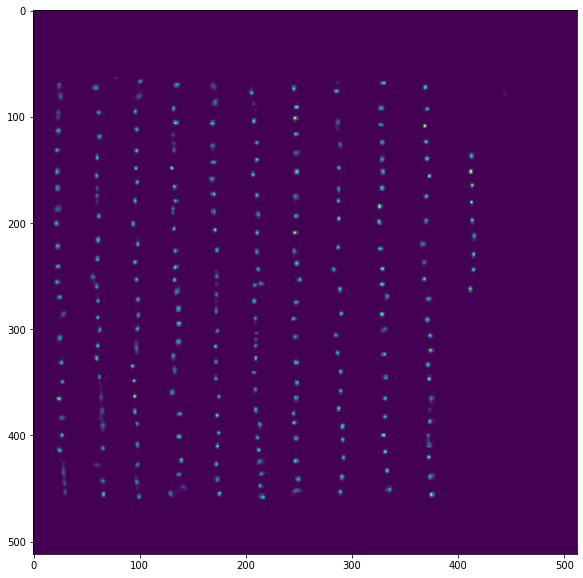

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

In [25]:
learn_gen.save("stage-1")

In [26]:
learn_gen = learn_gen.load("stage-1")

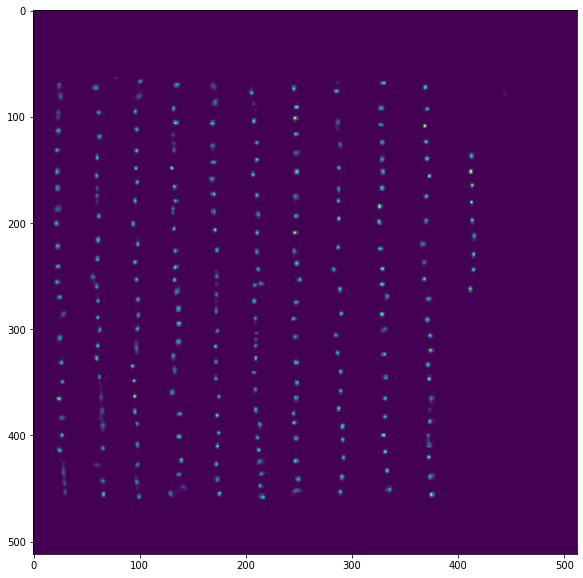

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

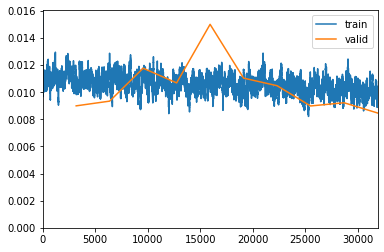

In [28]:
learn_gen.fit(10, 1e-4)

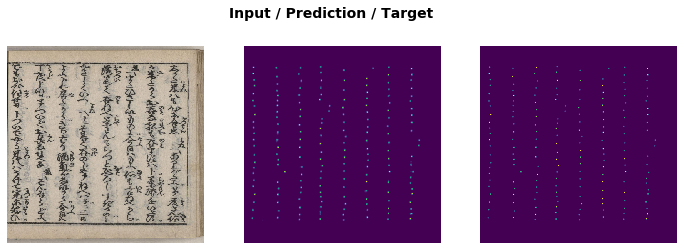

In [29]:
learn_gen.show_results()

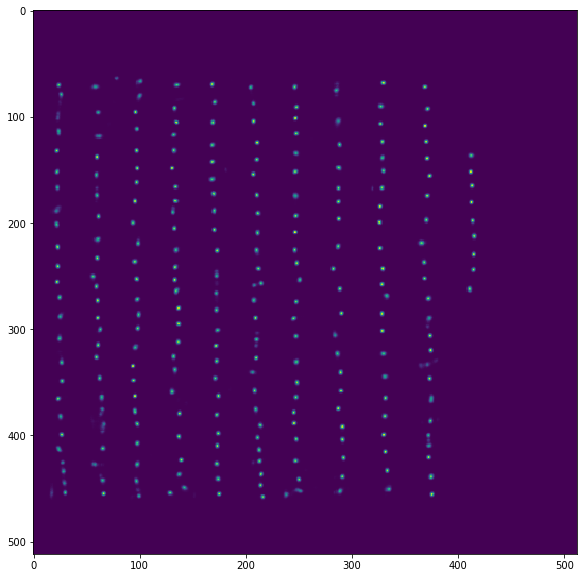

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

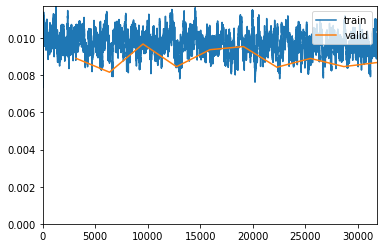

In [31]:
learn_gen.fit(10, 5e-5)

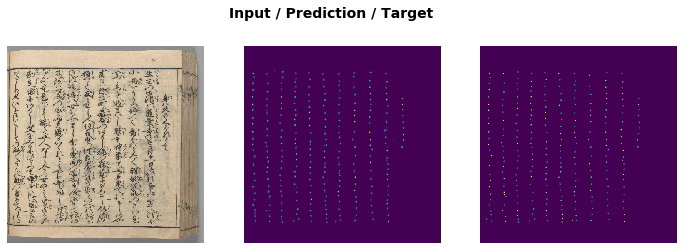

In [32]:
learn_gen.show_results(20)

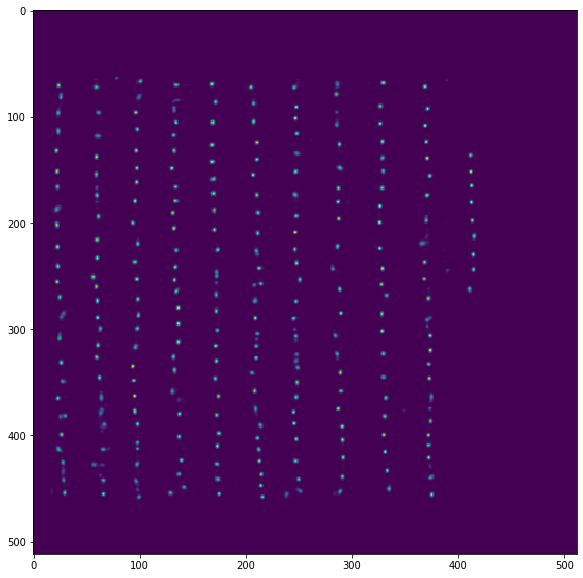

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(0))[0][0])

In [34]:
learn_gen.save("stage2_resnet34")

In [13]:
learn_gen = learn_gen.load("stage2_resnet34")

RuntimeError: Error(s) in loading state_dict for DynamicUnet:
	Missing key(s) in state_dict: "layers.3.0.0.weight", "layers.3.1.0.weight", "layers.4.shuf.conv.0.weight", "layers.4.conv1.0.weight", "layers.4.conv2.0.weight", "layers.5.shuf.conv.0.weight", "layers.5.conv1.0.weight", "layers.5.conv2.0.weight", "layers.6.shuf.conv.0.weight", "layers.6.conv1.0.weight", "layers.6.conv2.0.weight", "layers.7.shuf.conv.0.weight", "layers.7.conv1.0.weight", "layers.7.conv2.0.weight", "layers.8.conv.0.weight", "layers.10.layers.0.0.weight", "layers.10.layers.1.0.weight", "layers.11.0.weight". 
	Unexpected key(s) in state_dict: "layers.3.0.0.weight_g", "layers.3.0.0.weight_v", "layers.3.1.0.weight_g", "layers.3.1.0.weight_v", "layers.4.shuf.conv.0.weight_g", "layers.4.shuf.conv.0.weight_v", "layers.4.conv1.0.weight_g", "layers.4.conv1.0.weight_v", "layers.4.conv2.0.weight_g", "layers.4.conv2.0.weight_v", "layers.5.shuf.conv.0.weight_g", "layers.5.shuf.conv.0.weight_v", "layers.5.conv1.0.weight_g", "layers.5.conv1.0.weight_v", "layers.5.conv2.0.weight_g", "layers.5.conv2.0.weight_v", "layers.6.shuf.conv.0.weight_g", "layers.6.shuf.conv.0.weight_v", "layers.6.conv1.0.weight_g", "layers.6.conv1.0.weight_v", "layers.6.conv2.0.weight_g", "layers.6.conv2.0.weight_v", "layers.7.shuf.conv.0.weight_g", "layers.7.shuf.conv.0.weight_v", "layers.7.conv1.0.weight_g", "layers.7.conv1.0.weight_v", "layers.7.conv2.0.weight_g", "layers.7.conv2.0.weight_v", "layers.8.conv.0.weight_g", "layers.8.conv.0.weight_v", "layers.10.layers.0.0.weight_g", "layers.10.layers.0.0.weight_v", "layers.10.layers.1.0.weight_g", "layers.10.layers.1.0.weight_v", "layers.11.0.weight_g", "layers.11.0.weight_v". 

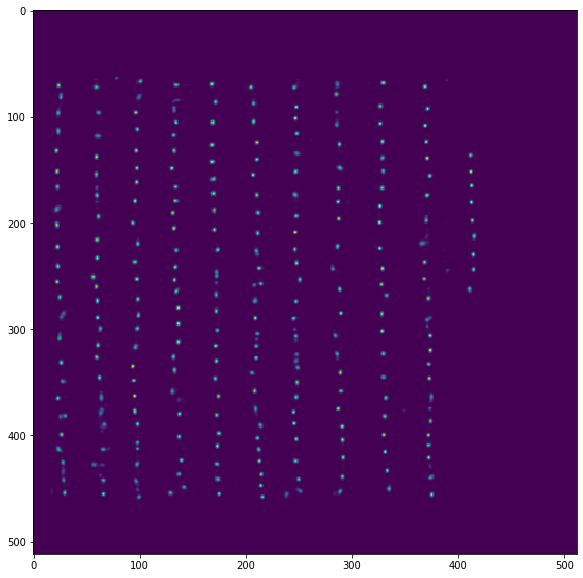

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(50))[0][0])

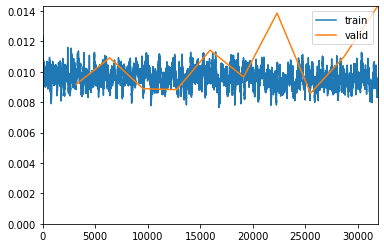

In [46]:
learn_gen.fit(10, slice(1e-4))

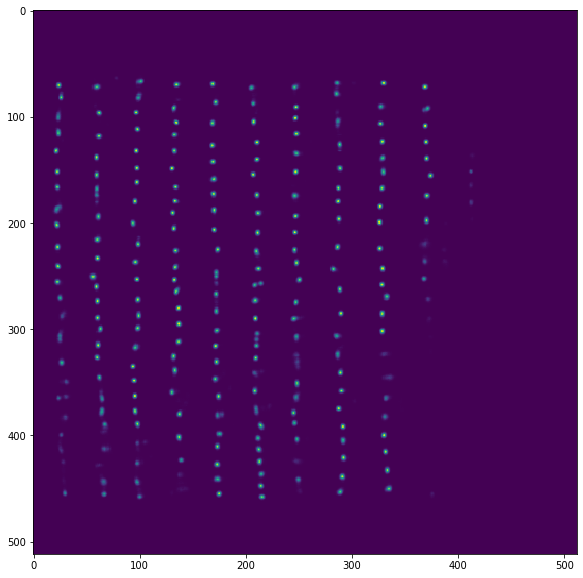

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(50))[0][0])

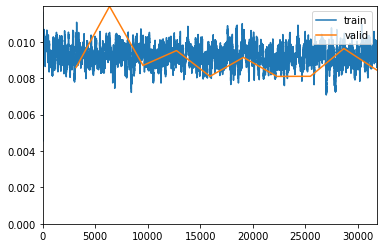

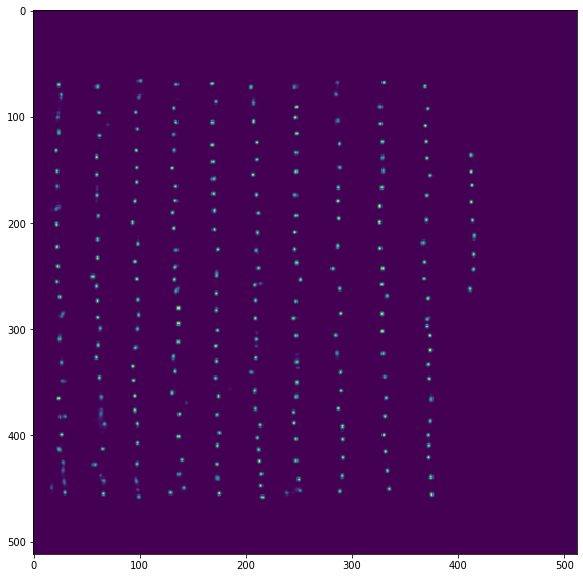

In [48]:
learn_gen.fit(10, slice(5e-5))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(50))[0][0])

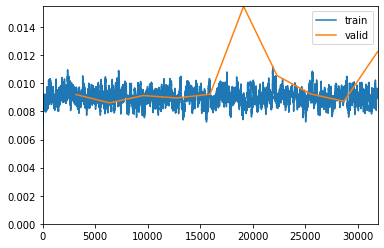

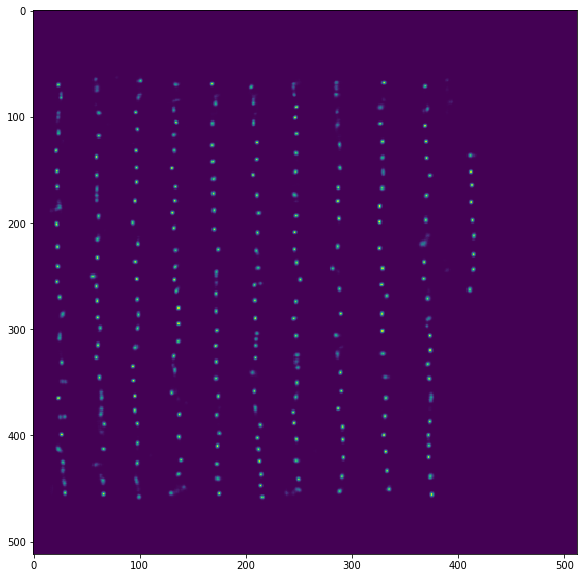

In [49]:
learn_gen.fit(10, slice(1e-5))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(50))[0][0])

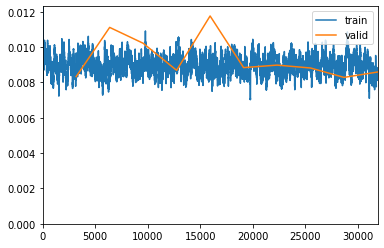

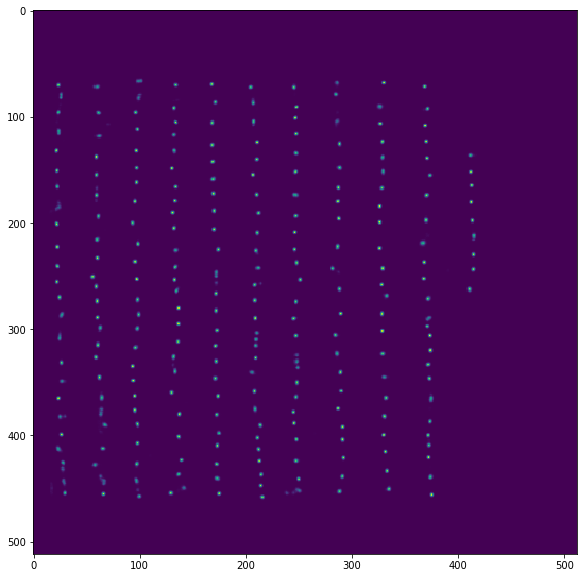

In [50]:
learn_gen.fit(10, slice(1e-5))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(50))[0][0])

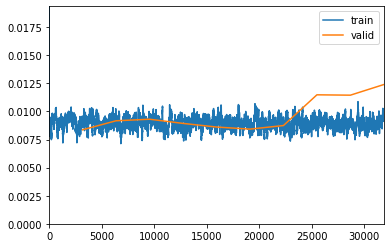

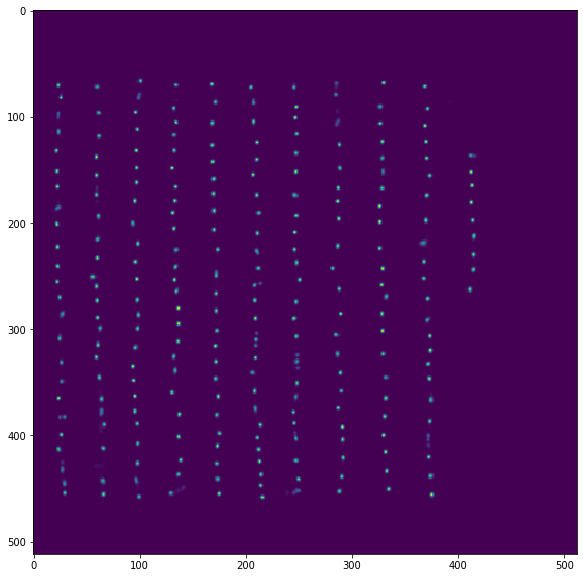

In [51]:
learn_gen.fit(10, slice(1e-5))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(learn_gen.pred_batch(50))[0][0])

In [15]:
learn_gen = create_gen_learner(data)
learn_gen = learn_gen.load("stage2")
learn_gen.unfreeze()

RuntimeError: Error(s) in loading state_dict for DynamicUnet:
	Missing key(s) in state_dict: "layers.0.4.2.conv1.weight", "layers.0.4.2.bn1.weight", "layers.0.4.2.bn1.bias", "layers.0.4.2.bn1.running_mean", "layers.0.4.2.bn1.running_var", "layers.0.4.2.conv2.weight", "layers.0.4.2.bn2.weight", "layers.0.4.2.bn2.bias", "layers.0.4.2.bn2.running_mean", "layers.0.4.2.bn2.running_var", "layers.0.5.2.conv1.weight", "layers.0.5.2.bn1.weight", "layers.0.5.2.bn1.bias", "layers.0.5.2.bn1.running_mean", "layers.0.5.2.bn1.running_var", "layers.0.5.2.conv2.weight", "layers.0.5.2.bn2.weight", "layers.0.5.2.bn2.bias", "layers.0.5.2.bn2.running_mean", "layers.0.5.2.bn2.running_var", "layers.0.5.3.conv1.weight", "layers.0.5.3.bn1.weight", "layers.0.5.3.bn1.bias", "layers.0.5.3.bn1.running_mean", "layers.0.5.3.bn1.running_var", "layers.0.5.3.conv2.weight", "layers.0.5.3.bn2.weight", "layers.0.5.3.bn2.bias", "layers.0.5.3.bn2.running_mean", "layers.0.5.3.bn2.running_var", "layers.0.6.2.conv1.weight", "layers.0.6.2.bn1.weight", "layers.0.6.2.bn1.bias", "layers.0.6.2.bn1.running_mean", "layers.0.6.2.bn1.running_var", "layers.0.6.2.conv2.weight", "layers.0.6.2.bn2.weight", "layers.0.6.2.bn2.bias", "layers.0.6.2.bn2.running_mean", "layers.0.6.2.bn2.running_var", "layers.0.6.3.conv1.weight", "layers.0.6.3.bn1.weight", "layers.0.6.3.bn1.bias", "layers.0.6.3.bn1.running_mean", "layers.0.6.3.bn1.running_var", "layers.0.6.3.conv2.weight", "layers.0.6.3.bn2.weight", "layers.0.6.3.bn2.bias", "layers.0.6.3.bn2.running_mean", "layers.0.6.3.bn2.running_var", "layers.0.6.4.conv1.weight", "layers.0.6.4.bn1.weight", "layers.0.6.4.bn1.bias", "layers.0.6.4.bn1.running_mean", "layers.0.6.4.bn1.running_var", "layers.0.6.4.conv2.weight", "layers.0.6.4.bn2.weight", "layers.0.6.4.bn2.bias", "layers.0.6.4.bn2.running_mean", "layers.0.6.4.bn2.running_var", "layers.0.6.5.conv1.weight", "layers.0.6.5.bn1.weight", "layers.0.6.5.bn1.bias", "layers.0.6.5.bn1.running_mean", "layers.0.6.5.bn1.running_var", "layers.0.6.5.conv2.weight", "layers.0.6.5.bn2.weight", "layers.0.6.5.bn2.bias", "layers.0.6.5.bn2.running_mean", "layers.0.6.5.bn2.running_var", "layers.0.7.2.conv1.weight", "layers.0.7.2.bn1.weight", "layers.0.7.2.bn1.bias", "layers.0.7.2.bn1.running_mean", "layers.0.7.2.bn1.running_var", "layers.0.7.2.conv2.weight", "layers.0.7.2.bn2.weight", "layers.0.7.2.bn2.bias", "layers.0.7.2.bn2.running_mean", "layers.0.7.2.bn2.running_var", "layers.3.0.0.weight", "layers.3.1.0.weight", "layers.4.shuf.conv.0.weight", "layers.4.conv1.0.weight", "layers.4.conv2.0.weight", "layers.5.shuf.conv.0.weight", "layers.5.conv1.0.weight", "layers.5.conv2.0.weight", "layers.6.shuf.conv.0.weight", "layers.6.conv1.0.weight", "layers.6.conv2.0.weight", "layers.7.shuf.conv.0.weight", "layers.7.conv1.0.weight", "layers.7.conv2.0.weight", "layers.8.conv.0.weight", "layers.10.layers.0.0.weight", "layers.10.layers.1.0.weight", "layers.11.0.weight". 
	Unexpected key(s) in state_dict: "layers.3.0.0.weight_g", "layers.3.0.0.weight_v", "layers.3.1.0.weight_g", "layers.3.1.0.weight_v", "layers.4.shuf.conv.0.weight_g", "layers.4.shuf.conv.0.weight_v", "layers.4.conv1.0.weight_g", "layers.4.conv1.0.weight_v", "layers.4.conv2.0.weight_g", "layers.4.conv2.0.weight_v", "layers.5.shuf.conv.0.weight_g", "layers.5.shuf.conv.0.weight_v", "layers.5.conv1.0.weight_g", "layers.5.conv1.0.weight_v", "layers.5.conv2.0.weight_g", "layers.5.conv2.0.weight_v", "layers.6.shuf.conv.0.weight_g", "layers.6.shuf.conv.0.weight_v", "layers.6.conv1.0.weight_g", "layers.6.conv1.0.weight_v", "layers.6.conv2.0.weight_g", "layers.6.conv2.0.weight_v", "layers.7.shuf.conv.0.weight_g", "layers.7.shuf.conv.0.weight_v", "layers.7.conv1.0.weight_g", "layers.7.conv1.0.weight_v", "layers.7.conv2.0.weight_g", "layers.7.conv2.0.weight_v", "layers.8.conv.0.weight_g", "layers.8.conv.0.weight_v", "layers.10.layers.0.0.weight_g", "layers.10.layers.0.0.weight_v", "layers.10.layers.1.0.weight_g", "layers.10.layers.1.0.weight_v", "layers.11.0.weight_g", "layers.11.0.weight_v". 

# Inference

In [76]:
import skimage.feature
import stable.utils; import stable.predict

classifier = load_learner(path=DATA/"train_images_chars_256", file="20190906_classifier-50-epochs").to_fp32()

def extract_peaks(heatmap, min_distance, threshold_abs):
    # cheers https://stackoverflow.com/questions/51672327/skimage-peak-local-max-finds-multiple-spots-in-close-proximity-due-to-image-impu
    heatmap_gray = np.array(PIL.Image.fromarray(heatmap).convert("L"))
    is_peak = skimage.feature.peak_local_max(heatmap_gray, min_distance=min_distance, indices=False, threshold_abs=threshold_abs, exclude_border=False) # add exclude_border
    labels = scipy.ndimage.measurements.label(is_peak)[0]
    merged_peaks = scipy.ndimage.measurements.center_of_mass(is_peak, labels, range(1, np.max(labels)+1))
    return np.array(merged_peaks)



def get_centers(im, model, hm_threshold=10, hm_min_distance=5, model_input_size=512):
    im = np.asarray(im)
    im_height, im_width = im.shape[:2]
    hm_min_distance *= (model_input_size / max(im_height, im_width))
    hm = stable.predict.process_output(model.predict(stable.predict.preprocess_input(im))).reshape(512, 512)
    peaks = extract_peaks(hm, hm_min_distance, hm_threshold)
    if len(peaks) > 0:
        peaks_x = peaks[:,1]
        peaks_y = peaks[:,0]
        peaks_x *= (im_width / model_input_size)
        peaks_y *= (im_height / model_input_size)
    else:
        peaks_x = []
        peaks_y = []
    return np.vstack([peaks_x, peaks_y]).transpose()

In [77]:
def visualize_detection(image_fn, threshold, min_dist):
    from PIL import Image, ImageDraw, ImageFont
    fontsize=36
    font = ImageFont.truetype('./NotoSansCJKjp-Regular.otf', fontsize, encoding='utf-8')

    labels = df_train.labels[df_train.image_id == image_fn.name[:-4]].iloc[0]
    
    # Read image
    imsource = Image.open(image_fn).convert('RGBA')
    bbox_canvas = Image.new('RGBA', imsource.size)
    char_canvas = Image.new('RGBA', imsource.size)
    bbox_draw = ImageDraw.Draw(bbox_canvas) # Separate canvases for boxes and chars so a box doesn't cut off a character
    char_draw = ImageDraw.Draw(char_canvas)
    
    # predict centers:
    centers = get_centers(imsource.convert("RGB"), learn_gen, hm_threshold=threshold, hm_min_distance=min_dist)
    
    if type(labels) == str and len(labels) > 0:
        labels = np.array(labels.split(" ")).reshape(-1, 5)
        for codepoint, x, y, w, h in labels:
            x, y, w, h = int(x), int(y), int(w), int(h)
            char = unicode_map[codepoint] # Convert codepoint to actual unicode character

            # Draw bounding box around character, and unicode character next to it
            bbox_draw.rectangle((x, y, x+w, y+h), fill=(255, 255, 255, 0), outline=(255, 0, 0, 255))
            char_draw.text((x + w + fontsize/4, y + h/2 - fontsize), char, fill=(255, 0, 0, 255), font=font)
        
    preds = []
    for x, y in centers:
        x, y = int(x), int(y)
        bbox_draw.rectangle((x-5, y-5, x+5, y+5), fill=(0,0,255,255))
        preds.append(["unk", x, y])

        
        
    imsource = Image.alpha_composite(Image.alpha_composite(imsource, bbox_canvas), char_canvas)
    imsource = imsource.convert("RGB") # Remove alpha for saving in jpg format.
    return np.asarray(imsource)

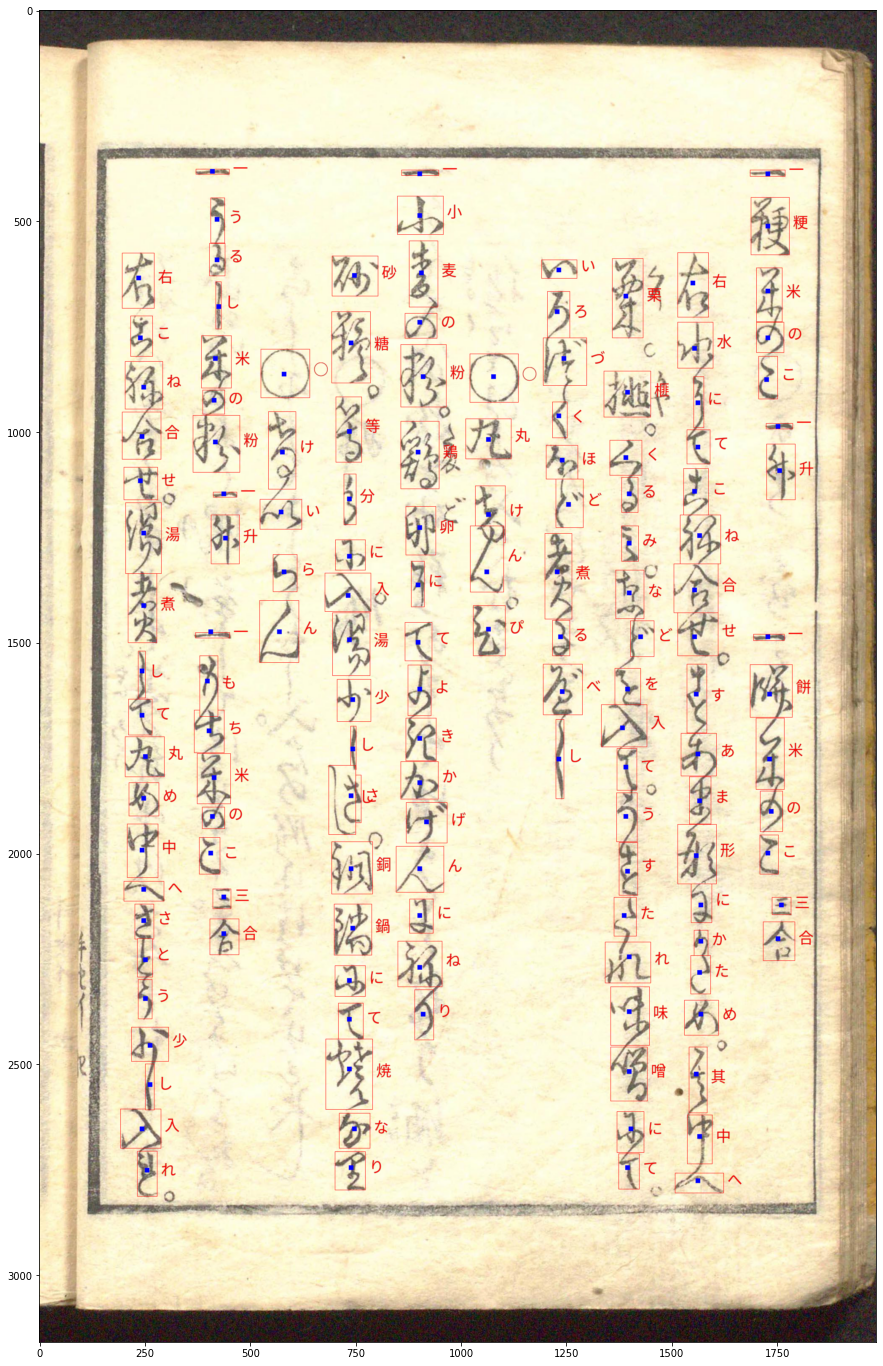

In [99]:
plt.figure(figsize=(15, 25))
plt.imshow(visualize_detection((DATA/"train_images"/f"{valid_fnames[90]}.jpg"), 20, 50), interpolation='bilinear')
plt.show()

In [84]:
valid_truth = pd.DataFrame(df_train[df_train.image_id.isin([name for name in valid_fnames])].values,
                           columns=["image_id", "labels"])
# Sorry for not knowing how to pandas

valid_preds = valid_truth.copy()
for i in range(len(valid_preds)):
    valid_preds.iloc[i].labels = np.nan

In [100]:
def predict_page(im_arr):
    im_height, im_width, colour_depth = im_arr.shape
    # for now just a square area around center
    r=128  # 256x256
    
    same_char_distance = max(im_height, im_width) // 20
    any_char_distance = 50#max(im_height, im_width) // 50  # 100
    confidence_threshold = 0.5 # 0.5
    hm_threshold = 20 # 10
    
    predictions = []
        
    centers = get_centers(im, learn_gen, hm_threshold=hm_threshold, hm_min_distance=any_char_distance)

    if centers is not None:
        for center_x, center_y in centers:
            center_x = int(center_x)
            center_y = int(center_y)
            x0, y0 = max(0, center_x - r), max(0, center_y - r)
            x1, y1 = center_x + r, center_y + r
            character_region = im_arr[y0:y1, x0:x1]
            prediction_ = classifier.predict(stable.predict.preprocess_input(character_region))
            confidence = torch.max(prediction_[2])
            prediction = prediction_[0].obj
            if prediction != "BACKGROUND" and confidence > confidence_threshold:
                predictions.append([prediction, center_x, center_y])
                
        for j in range(len(predictions)):
            for k in range(j+1, len(predictions)):
                if predictions[j] is not None and predictions[k] is not None:
                    if (predictions[j][1] - predictions[k][1]) ** 2 + (predictions[j][2] - predictions[k][2]) ** 2 < same_char_distance ** 2:
                        if predictions[j][0] == predictions[k][0]: # check if class is same
                            # move prediction to the midpoint of the two:
#                             predictions[j][1] = (predictions[j][1] + predictions[k][1]) // 2
#                             predictions[j][2] = (predictions[j][2] + predictions[k][2]) // 2
                            predictions[k] = None # ignore one of them
        predictions = [p for p in predictions if p is not None]
            
    return predictions

In [101]:
for i in tqdm(range(len(valid_preds))):
    fname = valid_preds.iloc[i].image_id
    im = PIL.Image.open(DATA/"train_images"/f"{fname}.jpg")
    im_arr = np.array(im)
    
    predictions = predict_page(im_arr)
    
    if len(predictions) > 0:
        predictions_str = " ".join([" ".join(map(str, i)) for i in predictions])
        valid_preds.iloc[i].labels = predictions_str
    else:
        valid_preds.iloc[i].labels = np.nan
        
    if i % 10 == 0:
        print(f1.kuzushiji_f1(valid_preds[:i+1], valid_truth[:i+1], detection_only=False),
              f1.kuzushiji_f1(valid_preds[:i+1], valid_truth[:i+1], detection_only=True))

0.8235294117647058 0.8235294117647058
0.8746630727762804 0.9272237196765499
0.9123533471359558 0.9459397285484242
0.9232486742952832 0.9528328216578286
0.9238911823859426 0.952683391552874
0.9238520926452661 0.9524583502641203
0.922722788556396 0.9513975665899376
0.919687828637848 0.9505728676592683
0.9131581518022858 0.947933965028817
0.9162187796395826 0.9497312677837495
0.918841645223216 0.9511906220642896
0.9221880671086257 0.95344616866042
0.9241112356116941 0.9553495636820482
0.9269513627093504 0.9576663988628639
0.924598051871846 0.9561671165356179
0.9179751839244538 0.9523443504996157
0.919017565204167 0.9531848021696703
0.9195477633950516 0.9535825472250181
0.9187479261143678 0.953567083287247
0.9175841263917398 0.9532458377392135
0.9175754501648491 0.9533155153241383
0.9185269705725381 0.9536411653201318
0.9183368647747403 0.9533849734273507
0.9176416382814171 0.9532836385776111
0.9170326223337516 0.9534190715181933
0.9167426904957751 0.9535033276003889
0.9170153516601214 0.9

KeyboardInterrupt: 

In [102]:
for i in tqdm(range(len(valid_preds))):
    fname = valid_preds.iloc[i].image_id
    im = PIL.Image.open(DATA/"train_images"/f"{fname}.jpg")
    im_arr = np.array(im)
    
    predictions = predict_page(im_arr)
    
    if len(predictions) > 0:
        predictions_str = " ".join([" ".join(map(str, i)) for i in predictions])
        valid_preds.iloc[i].labels = predictions_str
    else:
        valid_preds.iloc[i].labels = np.nan
        
    if i % 10 == 0:
        print(f1.kuzushiji_f1(valid_preds[:i+1], valid_truth[:i+1], detection_only=False),
              f1.kuzushiji_f1(valid_preds[:i+1], valid_truth[:i+1], detection_only=True))

0.8235294117647058 0.8235294117647058
0.8746630727762804 0.9272237196765499
0.9123533471359558 0.9459397285484242
0.9232486742952832 0.9528328216578286
0.9238911823859426 0.952683391552874
0.9238520926452661 0.9524583502641203
0.922722788556396 0.9513975665899376
0.919687828637848 0.9505728676592683
0.9131581518022858 0.947933965028817
0.9162187796395826 0.9497312677837495
0.918841645223216 0.9511906220642896
0.9221880671086257 0.95344616866042
0.9241112356116941 0.9553495636820482
0.9269513627093504 0.9576663988628639
0.924598051871846 0.9561671165356179
0.9179751839244538 0.9523443504996157
0.919017565204167 0.9531848021696703
0.9195477633950516 0.9535825472250181
0.9187479261143678 0.953567083287247
0.9175841263917398 0.9532458377392135
0.9175754501648491 0.9533155153241383
0.9185269705725381 0.9536411653201318
0.9183368647747403 0.9533849734273507
0.9176416382814171 0.9532836385776111
0.9170326223337516 0.9534190715181933
0.9167426904957751 0.9535033276003889
0.9170153516601214 0.9

In [113]:
f1.kuzushiji_f1(valid_preds, valid_truth, detection_only=False)

0.9187312260589193

In [103]:
def visualize_training_data(image_fn, preds, labels):
    from PIL import Image, ImageDraw, ImageFont
    fontsize=36
    font = ImageFont.truetype('./NotoSansCJKjp-Regular.otf', fontsize, encoding='utf-8')

    
    # Read image
    imsource = Image.open(image_fn).convert('RGBA')
    bbox_canvas = Image.new('RGBA', imsource.size)
    char_canvas = Image.new('RGBA', imsource.size)
    bbox_draw = ImageDraw.Draw(bbox_canvas) # Separate canvases for boxes and chars so a box doesn't cut off a character
    char_draw = ImageDraw.Draw(char_canvas)

    if type(labels) == str and len(labels) > 0:
        labels = np.array(labels.split(" ")).reshape(-1, 5)
        for codepoint, x, y, w, h in labels:
            x, y, w, h = int(x), int(y), int(w), int(h)
            char = unicode_map[codepoint] # Convert codepoint to actual unicode character

            # Draw bounding box around character, and unicode character next to it
            bbox_draw.rectangle((x, y, x+w, y+h), fill=(255, 255, 255, 0), outline=(255, 0, 0, 255))
            char_draw.text((x + w + fontsize/4, y + h/2 - fontsize), char, fill=(255, 0, 0, 255), font=font)
        
    if type(preds) == str and len(preds) > 0:
        preds = np.array(preds.split(" ")).reshape(-1, 3) 
        for codepoint, x, y in preds:
            x, y = int(x), int(y)
            char = unicode_map[codepoint]
            bbox_draw.rectangle((x-5, y-5, x+5, y+5), fill=(0,0,255,255))
            char_draw.text((x+25, y-fontsize*(3/4)), char, fill=(0, 0, 255, 255), font=font)


    imsource = Image.alpha_composite(Image.alpha_composite(imsource, bbox_canvas), char_canvas)
    imsource = imsource.convert("RGB") # Remove alpha for saving in jpg format.
    return np.asarray(imsource)

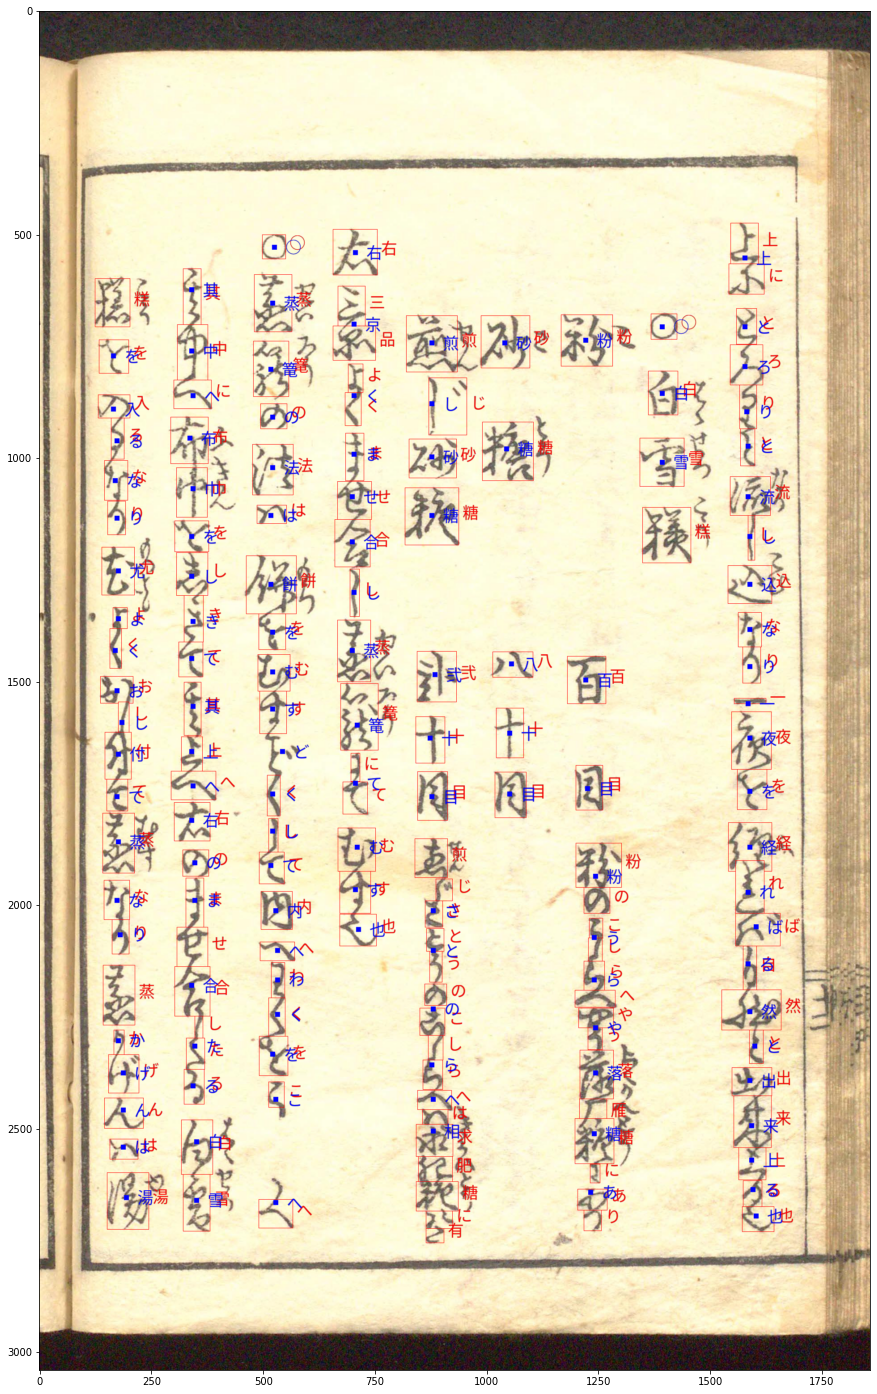

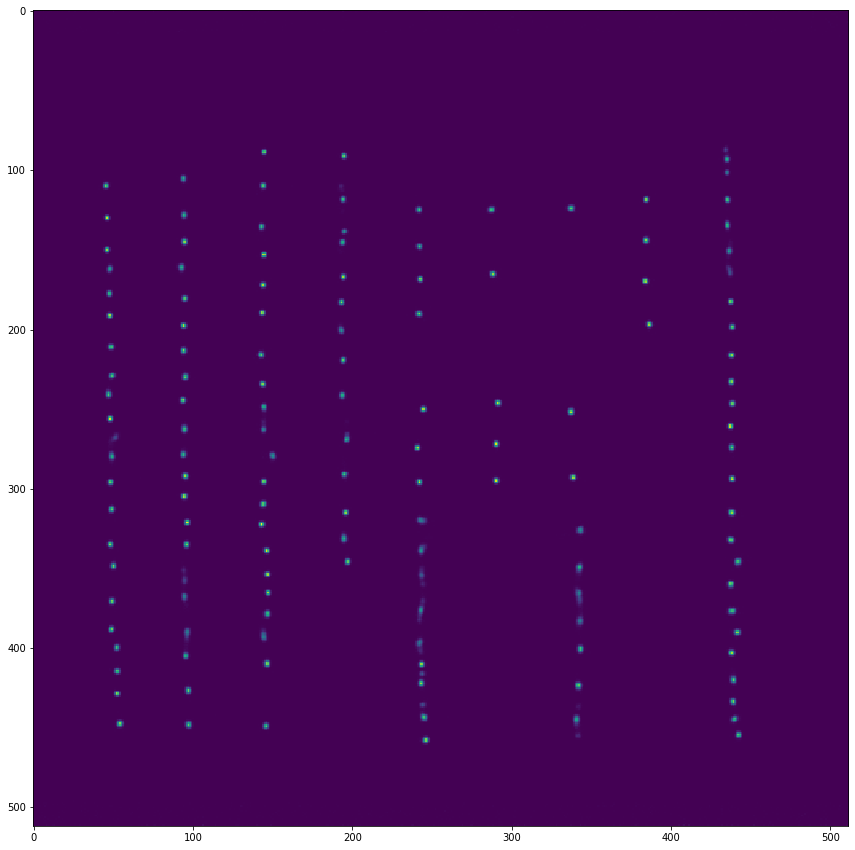

In [104]:
i = 35

viz = visualize_training_data(DATA/"train_images"/(valid_preds.iloc[i].image_id + ".jpg"), valid_preds.iloc[i].labels, valid_truth.iloc[i].labels)
plt.figure(figsize=(15, 25))
#plt.title(img)
plt.imshow(viz, interpolation='bilinear')
plt.show()

im = np.asarray(PIL.Image.open(DATA/"train_images"/(valid_preds.iloc[i].image_id + ".jpg")))
hm = stable.predict.process_output(learn_gen.predict(stable.predict.preprocess_input(im)))
plt.figure(figsize=(15,15))
plt.imshow(hm.reshape(512, 512))
plt.show()

### Test set predictions

In [105]:
submission = pd.read_csv(DATA/"sample_submission.csv")
for i in range(len(submission)):
    submission.iloc[i].labels = np.nan

In [107]:
for i in tqdm(range(len(submission))):
    fname = submission.iloc[i].image_id
    im = PIL.Image.open(DATA/"test_images"/f"{fname}.jpg")
    im_arr = np.array(im)
    
    im_height, im_width, colour_depth = im_arr.shape
    # for now just a square area around center
    r=128  # 256x256
    
    predictions = predict_page(im_arr)
    
    if len(predictions) > 0:
        predictions_str = " ".join([" ".join(map(str, i)) for i in predictions])
        submission.iloc[i].labels = predictions_str
    else:
        submission.iloc[i].labels = np.nan

In [108]:
# actually,
submission_no = 13

In [109]:
submission.to_csv(f"submissions/submission{submission_no}.csv", index=False)

In [110]:
# Also save validation set predictions for same model
valid_preds.to_csv(f"submissions/submission{submission_no}.valid.csv", index=False)

In [112]:
submission.head()

image_id                                             labels
0  test_00145af3  U+3064 587 609 U+3055 755 616 U+3068 1256 616 ...
1  test_001c37e2  U+4E00 1011 752 U+304B 1178 771 U+6B21 1318 77...
2  test_003aa33a  U+3053 1154 756 U+8AF8 1302 756 U+3066 1461 76...
3  test_00665e33  U+3057 488 547 U+4E16 1214 544 U+3066 220 556 ...
4  test_006964dc  U+4E00 1784 580 U+307E 1289 586 U+3084 638 593...